In [1]:
!pip install --upgrade tensorflow

In [7]:
import tensorflow as tf
from tensorflow import keras

datasets = keras.datasets
layers = keras.layers
models = keras.models

In [8]:
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import pandas as pd

In [9]:
tf.__version__

'2.18.0'

In [10]:
%load_ext tensorboard

In [11]:
logdir = 'log'

In [12]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images/255.0, test_images/255.0

classes = [0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [15]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x=train_images,
          y = train_labels,
          epochs = 5,
          validation_data = (test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 40ms/step - accuracy: 0.9038 - loss: 0.3141 - val_accuracy: 0.9844 - val_loss: 0.0528
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9849 - loss: 0.0468 - val_accuracy: 0.9875 - val_loss: 0.0380
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 36ms/step - accuracy: 0.9891 - loss: 0.0331 - val_accuracy: 0.9898 - val_loss: 0.0316
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 93s 42ms/step - accuracy: 0.9917 - loss: 0.0259 - val_accuracy: 0.9885 - val_loss: 0.0353
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 104s 54ms/step - accuracy: 0.9941 - loss: 0.0187 - val_accuracy: 0.9909 - val_loss: 0.0264


In [20]:
y_true = test_labels
y_pred = np.argmax(model.predict(test_images), axis=-1)

# the predict_classes attribute was removed from the Sequential model object in TensorFlow versions 2.6 and later.

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


In [19]:
classes = [0,1,2,3,4,5,6,7,8,9]

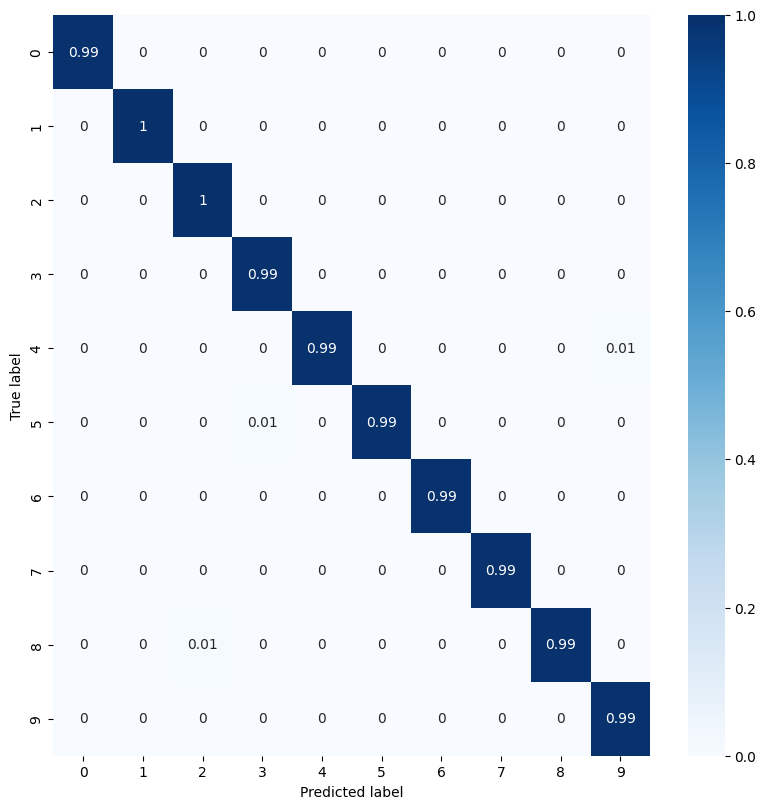

In [21]:
con_mat = tf.math.confusion_matrix(labels = y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float')/con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                          index = classes,
                          columns = classes)

figure = plt.figure(figsize=(8,8))
sns.heatmap(con_mat_df, annot=True, cmap = plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [22]:
def calculate_metrics_per_class(conf_matrix, classes):
    metrics = {}
    for i, cls in enumerate(classes):
        VP = conf_matrix[i, i]  # Diagonal principal
        FN = np.sum(conf_matrix[i, :]) - VP  # Linha da classe atual
        FP = np.sum(conf_matrix[:, i]) - VP  # Coluna da classe atual
        VN = np.sum(conf_matrix) - (VP + FN + FP)  # Restante da matriz

        # Calculando as métricas
        accuracy = (VP + VN) / np.sum(conf_matrix)
        recall = VP / (VP + FN) if (VP + FN) > 0 else 0
        specificity = VN / (VN + FP) if (VN + FP) > 0 else 0
        precision = VP / (VP + FP) if (VP + FP) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        # Salvando as métricas
        metrics[cls] = {
            'Acurácia': accuracy,
            'Recall': recall,
            'Especificidade': specificity,
            'Precisão': precision,
            'F1-Score': f1_score
        }
    return metrics

In [23]:
# Calculando as métricas por classe
metrics_per_class = calculate_metrics_per_class(con_mat, classes)

# Exibindo as métricas
for cls, metrics in metrics_per_class.items():
    print(f"Classe {cls}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.2f}")
    print()

Classe 0:
  Acurácia: 1.00
  Recall: 0.99
  Especificidade: 1.00
  Precisão: 1.00
  F1-Score: 1.00

Classe 1:
  Acurácia: 1.00
  Recall: 1.00
  Especificidade: 1.00
  Precisão: 0.99
  F1-Score: 1.00

Classe 2:
  Acurácia: 1.00
  Recall: 1.00
  Especificidade: 1.00
  Precisão: 0.98
  F1-Score: 0.99

Classe 3:
  Acurácia: 1.00
  Recall: 0.99
  Especificidade: 1.00
  Precisão: 0.99
  F1-Score: 0.99

Classe 4:
  Acurácia: 1.00
  Recall: 0.99
  Especificidade: 1.00
  Precisão: 0.99
  F1-Score: 0.99

Classe 5:
  Acurácia: 1.00
  Recall: 0.99
  Especificidade: 1.00
  Precisão: 0.99
  F1-Score: 0.99

Classe 6:
  Acurácia: 1.00
  Recall: 0.99
  Especificidade: 1.00
  Precisão: 0.99
  F1-Score: 0.99

Classe 7:
  Acurácia: 1.00
  Recall: 0.99
  Especificidade: 1.00
  Precisão: 0.98
  F1-Score: 0.99

Classe 8:
  Acurácia: 1.00
  Recall: 0.99
  Especificidade: 1.00
  Precisão: 1.00
  F1-Score: 0.99

Classe 9:
  Acurácia: 1.00
  Recall: 0.99
  Especificidade: 1.00
  Precisão: 0.99
  F1-Score: 0.99

